In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


<Axes: xlabel='area', ylabel='price'>

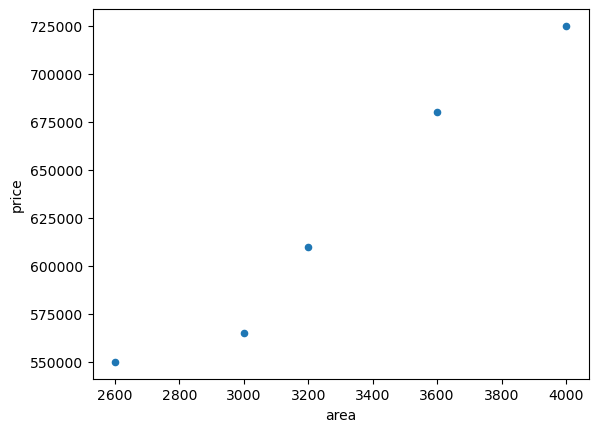

In [6]:
df.plot.scatter(x = 'area', y='price')

In [7]:
## creating a linear regression object
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [8]:
reg.predict([[3300]])

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

the regression model is automatically finding value for m and c in for line equation with the data provided

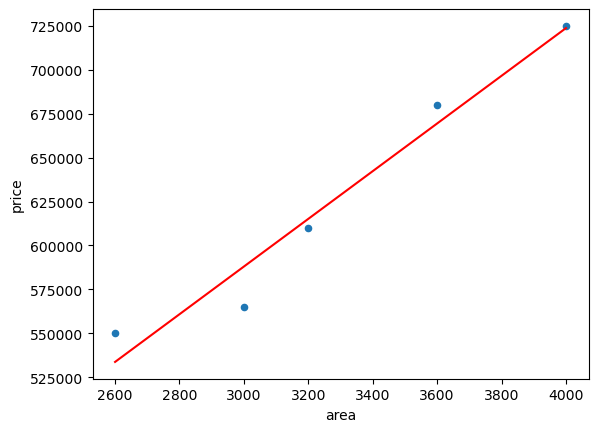

In [9]:
df.plot.scatter(x = 'area', y='price')
plt.plot(df['area'],reg.predict(df[['area']]), color = 'red')


In [10]:
df2 = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\canada_per_capita_income.csv")
df2

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [11]:
reg2 = linear_model.LinearRegression()
reg2.fit(df2[['year']], df2['per capita income (US$)'])

LinearRegression()

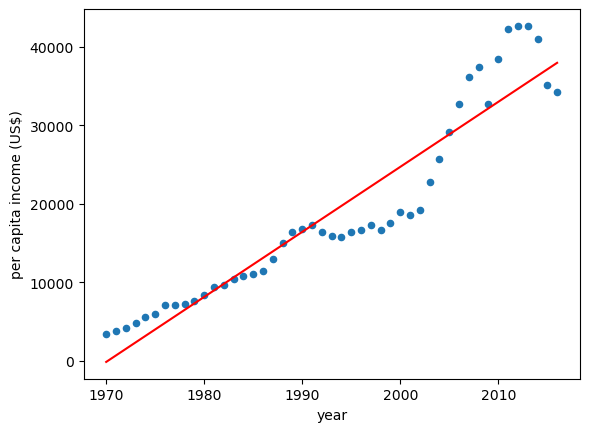

In [12]:
df2.plot.scatter(x = 'year', y = 'per capita income (US$)')
plt.plot(df2[['year']], reg2.predict(df2[['year']]), color = 'red')

In [13]:
reg2.predict([[2020]])

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

#### Linear regression with multiple variables 

In [14]:
df3 = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\homeprices2.csv")
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


##### handling missing values

In [15]:
df3['bedrooms'].median()

4.0

In [16]:
df3.fillna(4, inplace= True)
df3

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [17]:
reg3 = linear_model.LinearRegression()
reg3.fit(df3[['area','bedrooms','age']], df3['price'])
## the first instance is the independent variable and second instance is the target variable


LinearRegression()

In [18]:
reg3.predict([[3500,2.0,3]])

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([650624.15509285])

##### saving model into a file to be used repeatedly in future

In [19]:
import pickle


In [20]:
with open('model_pickle', 'wb') as f:
    pickle.dump(reg3, f)
## model_pickle is the name of file saved for my regression model

In [21]:
with open('model_pickle','rb') as f:
    reg4 = pickle.load(f)

In [23]:
reg4.predict([[4000,3,23]])

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([665409.8979692])

##### W in wb is for write and r in rb is for read

In [2]:
import joblib

In [27]:
joblib.dump(reg3, 'reg3_save')

['reg3_save']

In [4]:
reg3_re = joblib.load('reg3_save')

In [5]:
reg3_re.predict([[3498,2,7]])

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([637473.15857444])

##### joblib is more efficient in saving the models

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([637473.15857444])

In [2]:
df4 = pd.read_csv(r"C:\Users\SIDDHARTH\OneDrive\Documents\JOB PROFILES\Data Analyst\Machine Learning\homeprices3.csv")
df4
## we will be handling text data here 


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


#### ONE HOT ENCODING 

In [3]:
## creating dummy variables
dummies = pd.get_dummies(df4['town'], dtype = int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [4]:

merged = pd.concat([df4,dummies], axis= 'columns')
merged.drop(columns= 'town', inplace= True)

In [5]:
## we will have to drop one dummy variable column i.e for k dummies we need k-1 at the end
merged.drop(columns= 'west windsor', inplace= True)


In [6]:
merged

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
one_hot = LinearRegression()

In [8]:
x = merged.drop(columns='price')
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [9]:
y = merged['price']

In [10]:
one_hot.fit(x, y)

LinearRegression()

In [11]:
one_hot.predict([[2800,0,1]])
## this is for the town robinsville

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [29]:
one_hot.predict([[2800,0,0]])
## west windsor

c:\Users\SIDDHARTH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([605103.20361213])

In [12]:
one_hot.score(x,y)

0.9573929037221873